In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pystan
from scipy.stats import mstats
%matplotlib inline

In [2]:
plt.style.use("ggplot")

In [3]:
df=pd.read_excel("./data/real_estate1.xlsx")

In [4]:
df.head(3)

,id,space,room,value
0,1,50,2LDK,3050
1,2,70,2LDK,4690
2,3,70,2SLDK,4830


In [6]:
stan_model="""
data {
  int N;
  real X[N];
  real Y[N];
  int N_s;
  real X_s[N_s];
}
parameters{
  real a;
  real b;
  real<lower=0> sigma;
}

model{
  for (n in 1:N){
    Y[n]~normal(a*X[n]+b,sigma);
  }
}

generated quantities {
  real Y_s[N_s];
  for (n in 1:N_s){
    Y_s[n]=normal_rng(a*X_s[n]+b,sigma);
  }
}
"""

In [7]:
sm=pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_351b3981a861312226ff1d0ab718ba0d NOW.


In [9]:
X_s=np.arange(40,90,1)
N_s=X_s.shape[0]
stan_data={"N":df.shape[0],"X":df["space"],"Y":df["value"],"N_s":N_s,"X_s":X_s}

In [10]:
fit=sm.sampling(data=stan_data,iter=2000,warmup=500,chains=3,seed=123)

In [15]:
fit.extract("a")#サンプリングしたものを出す

OrderedDict([('a',
              array([ 77.09133032, 107.73966906,  91.28302211, ...,  67.29056738,
                      68.56209969,  65.09318035]))])

In [17]:
ms_a=fit.extract("a")["a"]

(array([   6.,   26.,  155.,  498., 1059., 1357.,  934.,  361.,   85.,
          19.]), array([ 32.64861892,  41.06662558,  49.48463224,  57.90263891,
         66.32064557,  74.73865223,  83.1566589 ,  91.57466556,
         99.99267222, 108.41067889, 116.82868555]), <a list of 10 Patch objects>)

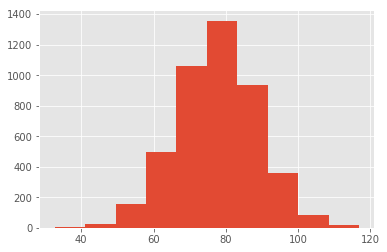

In [18]:
plt.hist(ms_a)

In [19]:
ms_b=fit.extract("b")["b"]

In [20]:
df_b=pd.DataFrame([])
for i in range(40,90,1):
    df_b[i]=ms_a*i+ms_b

In [21]:
df_b

,40,41,42,43,44,45,46,47,48,49,...,80,81,82,83,84,85,86,87,88,89
0,2345.002879,2422.094209,2499.185540,2576.276870,2653.368200,2730.459531,2807.550861,2884.642191,2961.733521,3038.824852,...,5428.656092,5505.747422,5582.838752,5659.930083,5737.021413,5814.112743,5891.204074,5968.295404,6045.386734,6122.478065
1,1210.483741,1318.223410,1425.963079,1533.702748,1641.442418,1749.182087,1856.921756,1964.661425,2072.401094,2180.140763,...,5520.070504,5627.810173,5735.549842,5843.289511,5951.029180,6058.768849,6166.508518,6274.248187,6381.987856,6489.727525
2,2025.247961,2116.530983,2207.814005,2299.097028,2390.380050,2481.663072,2572.946094,2664.229116,2755.512138,2846.795160,...,5676.568846,5767.851868,5859.134890,5950.417912,6041.700934,6132.983956,6224.266978,6315.550000,6406.833022,6498.116045
3,1778.946943,1868.078689,1957.210435,2046.342180,2135.473926,2224.605671,2313.737417,2402.869163,2492.000908,2581.132654,...,5344.216768,5433.348514,5522.480259,5611.612005,5700.743750,5789.875496,5879.007242,5968.138987,6057.270733,6146.402478
4,2686.829769,2761.807728,2836.785688,2911.763648,2986.741607,3061.719567,3136.697526,3211.675486,3286.653446,3361.631405,...,5685.948153,5760.926113,5835.904073,5910.882032,5985.859992,6060.837951,6135.815911,6210.793871,6285.771830,6360.749790
5,2050.455435,2126.609218,2202.763001,2278.916784,2355.070568,2431.224351,2507.378134,2583.531917,2659.685700,2735.839483,...,5096.606759,5172.760542,5248.914325,5325.068108,5401.221891,5477.375674,5553.529458,5629.683241,5705.837024,5781.990807
6,2763.660389,2830.319531,2896.978672,2963.637814,3030.296956,3096.956097,3163.615239,3230.274380,3296.933522,3363.592664,...,5430.026055,5496.685197,5563.344338,5630.003480,5696.662622,5763.321763,5829.980905,5896.640047,5963.299188,6029.958330
7,2633.900870,2704.532821,2775.164773,2845.796725,2916.428677,2987.060629,3057.692581,3128.324533,3198.956485,3269.588436,...,5459.178944,5529.810896,5600.442848,5671.074800,5741.706752,5812.338704,5882.970656,5953.602607,6024.234559,6094.866511
8,3041.290463,3096.372191,3151.453919,3206.535647,3261.617375,3316.699103,3371.780831,3426.862559,3481.944287,3537.026015,...,5244.559582,5299.641310,5354.723038,5409.804766,5464.886494,5519.968222,5575.049950,5630.131678,5685.213406,5740.295134
9,2904.464734,2965.820760,3027.176787,3088.532813,3149.888839,3211.244866,3272.600892,3333.956919,3395.312945,3456.668971,...,5358.705788,5420.061814,5481.417840,5542.773867,5604.129893,5665.485919,5726.841946,5788.197972,5849.553998,5910.910025


In [22]:
low_y50,high_y50=mstats.mquantiles(df_b,[0.25,0.75],axis=0)
low_y95,high_y95=mstats.mquantiles(df_b,[0.025,0.975],axis=0)

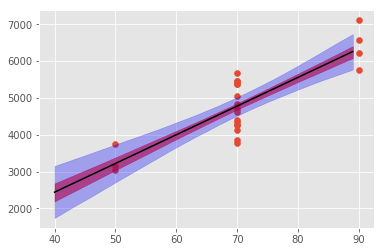

In [29]:
plt.scatter(df["space"],df["value"])
plt.fill_between(X_s,low_y50,high_y50,alpha=0.6,color="red")
plt.fill_between(X_s,low_y95,high_y95,alpha=0.3,color="blue")
a=77.9
b=-672.9
y=a*X_s+b
plt.plot(X_s,y,color="black")

In [30]:
Y_p=fit.extract("Y_s")["Y_s"]

In [31]:
low_y,high_y=mstats.mquantiles(Y_p,[0.025,0.975],axis=0)

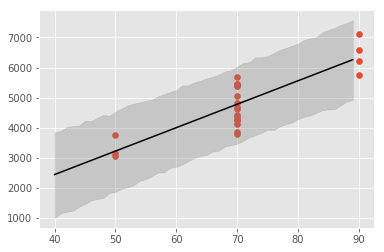

In [32]:
plt.scatter(df["space"],df["value"])
plt.fill_between(X_s,low_y,high_y,alpha=0.3,color="gray")
a=77.9
b=-672.9
y=a*X_s+b
plt.plot(X_s,y,color="black")